In [98]:
#1. Read the CSV Files
import pandas as pd
#Load ACC basketball data
dat = pd.read_csv('/Users/margotbrady/Downloads/acc_players-2324F.csv')
print(dat.head(5))
#There seems to be an issue with how this data was read. 
#I will clean this data quickly so the column names load correctly.

dat.columns = dat.iloc[0]
dat = dat.drop(0).reset_index(drop=True)

print(dat.info())
# It seems like these data columns are not the right type of data, so I will quickly go in and fix them.
numericcolumns = ['Rk','G','MP','TRB', 'AST', 'STL', 'BLK', 'TOV', 'PF', 'PTS','FG%','2P%', '3P%', 'FT%', 'PER', 'WS','BPM']
dat[numericcolumns] = dat[numericcolumns].apply(pd.to_numeric, errors='coerce')

print(dat.info())


  Unnamed: 0     Unnamed: 1 Unnamed: 2 Unnamed: 3      Unnamed: 4 Totals  \
0         Rk         Player      Class        Pos          School      G   
1          1   Amaree Abram         SO          G    Georgia Tech     10   
2          2   Sola Adebisi         FR          F   Florida State      7   
3          3  Prince Aligbe         SO          F  Boston College     35   
4          4     Abe Atiyeh         SR          G  Boston College      4   

  Unnamed: 6 Unnamed: 7 Unnamed: 8 Unnamed: 9  ... Unnamed: 11 Unnamed: 12  \
0         MP        TRB        AST        STL  ...         TOV          PF   
1        108         17         11          1  ...           9          10   
2          9          1          1          0  ...           1           1   
3        651        119         21         15  ...          30          51   
4          6          0          0          0  ...           1           0   

  Unnamed: 13 Shooting Unnamed: 15 Unnamed: 16 Unnamed: 17 Advanced  \
0  

In [99]:
#Display the first 5 rows of the dataset
print(dat.head(5))

0  Rk         Player Class Pos          School   G   MP  TRB  AST  STL  ...  \
0   1   Amaree Abram    SO   G    Georgia Tech  10  108   17   11    1  ...   
1   2   Sola Adebisi    FR   F   Florida State   7    9    1    1    0  ...   
2   3  Prince Aligbe    SO   F  Boston College  35  651  119   21   15  ...   
3   4     Abe Atiyeh    SR   G  Boston College   4    6    0    0    0  ...   
4   5    Zack Austin    JR   F      Pittsburgh  33  746  137   29   32  ...   

0  TOV  PF  PTS    FG%    2P%    3P%    FT%   PER   WS  BPM  
0    9  10   34  0.262  0.318  0.200  0.615   4.1 -0.1 -6.4  
1    1   1    2  0.500  0.500    NaN    NaN   3.5  0.0 -6.7  
2   30  51  164  0.435  0.522  0.147  0.620   9.4  0.9 -1.3  
3    1   0    3  0.333  0.000  1.000    NaN   1.1  0.0 -8.2  
4   13  35  216  0.417  0.563  0.295  0.737  18.0  2.9  7.9  

[5 rows x 21 columns]


In [100]:
#2. Basic Analysis
# Calculate the total points scored by all players combined
print('Total Points Scored by All Players: ')
print(dat.PTS.sum())
#Find the player who has played the most minutes(MP)
mostmp = dat[['Player', 'MP']].sort_values(by='MP', ascending=False).head(1)
print('\n Player With the Most Minutes Played: ')
print(mostmp.to_string(index=False))
#Identify the top 5 players in terms of total rebounds (TRB)
mosttrb = dat[['Player', 'TRB']].sort_values(by='TRB', ascending=False).head(5)
print('\n Top 5 Players for Total Rebounds: ')
print(mosttrb.to_string(index=False))

Total Points Scored by All Players: 
38411

 Player With the Most Minutes Played: 
       Player   MP
Casey Morsell 1333

 Top 5 Players for Total Rebounds: 
         Player  TRB
  Armando Bacot  380
Ian Schieffelin  340
Harrison Ingram  327
 Mohamed Diarra  311
  Norchad Omier  309


In [101]:
#3.Player Filtering
#Create a new DataFrame containing only players who played more than 500 minutes
manymp = dat[dat['MP'] > 500] 
print(manymp.head(10))
#From this filtered DataFrame, determine the player with the highest total assists (AST)
highassistsandmps = manymp[['Player', 'AST']].sort_values(by='AST', ascending=False).head(1)
print('\n Player With The Highest Total Assists Out of Those With >500 Minutes Played ')
print(highassistsandmps.to_string(index=False))

#Who are the top 3 Assist Leads in the League?
mostassists = dat[['Player', 'AST']].sort_values(by='AST', ascending=False).head(3)
print('\n Top 3 Assist Leads in the League')
print(mostassists.to_string(index=False))

#Who are the top 3 Shot Blockers?
topshotblockers = dat[['Player', 'BLK']].sort_values(by='BLK', ascending=False).head(3)
print('\n Top 3 Shot Blockers in the League')
print(topshotblockers.to_string(index=False))


0   Rk          Player Class Pos          School   G    MP  TRB  AST  STL  \
2    3   Prince Aligbe    SO   F  Boston College  35   651  119   21   15   
4    5     Zack Austin    JR   F      Pittsburgh  33   746  137   29   32   
5    6   Armando Bacot    SR   F  North Carolina  37  1123  380   56   22   
7    8   Reece Beekman    SR   G        Virginia  34  1114  124  212   68   
9   10      Chris Bell    SO   F        Syracuse  32   865   75   21   18   
10  11    Robbie Beran    SR   F   Virginia Tech  34   758  133   38   20   
13  14     Carey Booth    FR   F      Notre Dame  33   656  142   15    7   
16  17     Maliq Brown    SO   F        Syracuse  32   948  230   59   71   
18  19  Blake Buchanan    FR   F        Virginia  34   511  107   12   14   
19  20  D.J. Burns Jr.    SR   F        NC State  41  1020  164  117   18   

0   ...  TOV   PF  PTS    FG%    2P%    3P%    FT%   PER   WS   BPM  
2   ...   30   51  164  0.435  0.522  0.147  0.620   9.4  0.9  -1.3  
4   ...   13

In [102]:
#4. School-based analysis

#Group the players by School and calculate the total points scored by each school
schoolpoints = dat.groupby('School')['PTS'].sum()
print('\nTotal Points Scored by Each School: ')
print(schoolpoints)

#Group the players by School and calculate the total assists (AST) for each team
schoolassts = dat.groupby('School')['AST'].sum()
print('\nTotal Assists by Each School: ')
print(schoolassts)

#Sort the schools by total points scored and display the top 3 schools.
top3 = schoolpoints.sort_values(ascending=False).head(3)
print('\nTop Three Scoring Schools:  ')
print(top3)


Total Points Scored by Each School: 
School
Boston College    2667
Clemson           2785
Duke              2830
Florida State     2526
Georgia Tech      2272
Louisville        2304
Miami (FL)        2424
NC State          3101
North Carolina    3032
Notre Dame        2113
Pittsburgh        2495
Syracuse          2442
Virginia          2140
Virginia Tech     2547
Wake Forest       2733
Name: PTS, dtype: int64

Total Assists by Each School: 
School
Boston College    509
Clemson           533
Duke              551
Florida State     406
Georgia Tech      425
Louisville        356
Miami (FL)        454
NC State          536
North Carolina    536
Notre Dame        335
Pittsburgh        452
Syracuse          442
Virginia          509
Virginia Tech     514
Wake Forest       429
Name: AST, dtype: int64

Top Three Scoring Schools:  
School
NC State          3101
North Carolina    3032
Duke              2830
Name: PTS, dtype: int64


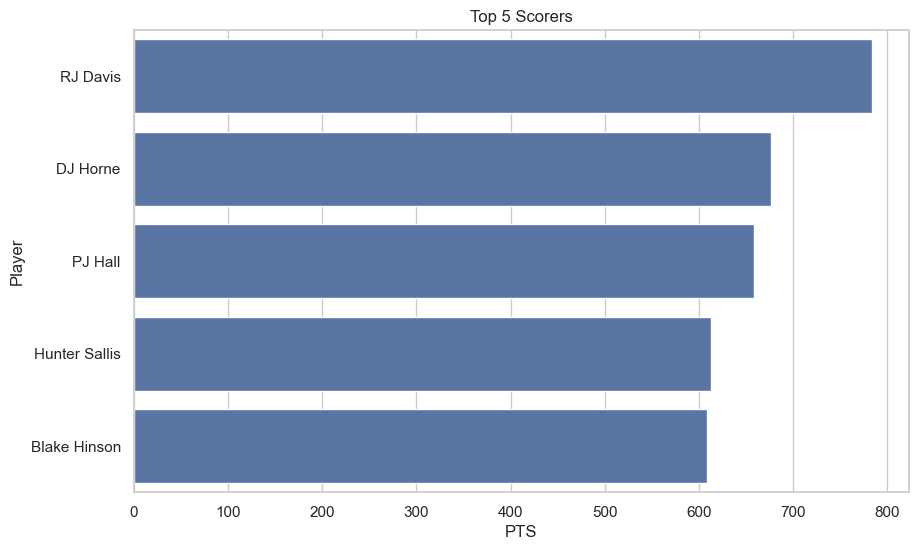

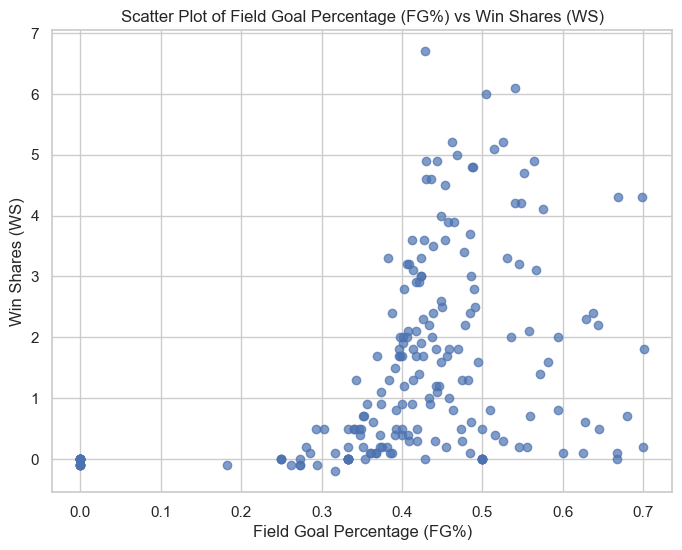

Correlation Coefficient: 0.421066389419978


In [103]:
# Bonus: 
top5scores = dat[['Player', 'PTS']].sort_values(by='PTS', ascending=False).head(5)

# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Set the style for the plots
sns.set(style="whitegrid")

# Create a bar chart showing the top 5 players by total points scored (PTS).
plt.figure(figsize=(10,6))
sns.barplot(x='PTS', y='Player', data=top5scores)
plt.title('Top 5 Scorers')
plt.show()


#Correlation: Investigate whether there is any correlation between a player's field goal
#percentage (FG%) and their win shares (WS). Provide a scatter plot and calculate the
#correlation coefficient.
#Calculate it
corrcoeff= dat['FG%'].corr(dat['WS'])
#Plot
plt.figure(figsize=(8,6))
plt.scatter(x = 'FG%', y = 'WS', data = dat, alpha=0.7)
plt.title('Scatter Plot of Field Goal Percentage (FG%) vs Win Shares (WS)')
plt.xlabel('Field Goal Percentage (FG%)')
plt.ylabel('Win Shares (WS)')
plt.show()

print(f"Correlation Coefficient: {correlation_coefficient}")

Reflection: 

What did you learn about working with CSV files and pandas DataFrames in
this assignment?

Reflect on the specific skills or techniques you developed, such as reading,
filtering, or manipulating data, and how these skills can be applied to future
data analysis projects.

When loading a CSV dataset into a pandas dataframe, I learned the importance of checking the details of the dataset before manipulating it in any way. Right away, I saw that the structure of the dataset had been compromised when converting it from CSV, and I had to fix the headers. Additionally, I ran into issues where I had to convert the datatypes before they were able to be used to calculate sums, means, or other numerical functions. In future data analysis projects, I will always use the .info() or .describe() functions to double-check that the dataset is structured as I thought it was.  These skills—ensuring data integrity and properly handling data types—will be crucial in future analyses where it will not be as obvious that there was an issue with the data types. 


What was the most challenging aspect of this assignment, and how did you
overcome it?
Explain the difficulties you encountered, whether it was related to coding,
understanding the data, or performing specific analyses, and describe the
strategies you used to work through the challenges.

The most challenging part of this assignment was learning how to reset the column headers. I head to rename all of the columns to a specific row, and then drop that row. Additionally, I came into an issue the first time I tried to sum the data, and it returned an incredibly large but incorrect number. This was due to the fact that the data was all "object" types, and so any number that needed to be an integer or float would not behave like a normal number. This made all operations virtually impossible, and so I had to convert all of this data to numeric data types. Thankfully, pandas has a function to_numeric which automatically converts data to its numeric type, choosing float or integer based off if it's a whole number or not. This resolved the issue and allowed me to proceed with the analysis.

How do you think the insights gained from analyzing ACC basketball statistics
could be applied to other real-world datasets?

Consider the broader implications of using data analysis techniques on
different datasets, whether in sports, business, healthcare, or other fields, and
discuss how this experience prepares you for future data science challenges.


In the ACC Basketball Dataset, I mainly used the dataset to find statistics that would be hard to find by just looking at the dataset. I was able to separate data into categories, and then analyze historical data to show top performers and teams. This information is important in any industry. In business, for instance, identifying top performers is crucial for making data-driven decisions about allocating additional funding to high-performing teams. Companies can give raises and promotions to people bringing in the most revenue, or who have the highest closing rate on sales. Finding the correlation between variables is also helpful in business. If a company wants to analyze the correlation rate between Managers and sales, it can identify which managers are doing well, and which are potentially harming the company. In healthcare, correlation analysis is particularly useful in drug trials, allowing researchers to determine which factors contribute to successful outcomes. This experience prepared me well for using real-life datasets to find new statistics. I gained experience in data manipulation and aggregation, using tools like Pandas to group, filter, and summarize data, which is invaluable when dealing with larger and more complex datasets. The project also helped me understand how to perform correlation analysis, such as identifying relationships between variables like field goal percentage and win shares. These techniques are very helpful for tasks like predicting customer behavior, optimizing business strategies, or analyzing healthcare outcomes, all realistic tasks I could be asked to complete when given a dataset. 